# Algoritmus k-najbližších susedov (KNN) a zhlukovanie (Clustering)

- algoritmy stojového učenia KNN a zhlukovanie budú popísane z teoretického hladiska a vysvetlené na praktickom príklade

---

### Praktický príklad

#### Klasifikácia objektov do tried

- aplikujeme **KNN** a **Clustering** na klasifikáciu objektov na základe ich vlastností 
- na výber budú 2 datasety - druhy kvetov a druhy vína
- pre vizualizáciu a zjednodušenie budeme používať len 2 vlastnosti objektov - 2D priestor
- datasety obsahujú 3 triedy objektov

---

In [10]:
# Importovanie

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris, load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, adjusted_rand_score, silhouette_score

In [11]:
# Načítanie dát pre modely

data = load_iris()  #load_iris() load_wine()
X = data.data[:, :2]
y = data.target
target_names = data.target_names
print(f"Number of samples: {X.shape[0]}")

Number of samples: 150


---

## KNN
- **Princíp**: algoritmus klasifikuje nové dátové body na základe väčšinovej triedy ich **k** najbližších susedov v priestore
- **Parameter k**: určuje, koľko susedov sa zohľadňuje pri rozhodovaní - malé k robí model citlivým na šum, zatiaľ čo veľké k môže príliš vyhladiť hranice medzi triedami
- **Miera vzdialenosti**: podobnosť medzi dátovými bodmi sa určuje pomocou metrík, ako je Euklidovská alebo Manhattanská vzdialenosť
- **Predikcia**: pri predpovedi algoritmus vyhľadá **k** najbližších vzoriek z dát, teda **k** najbližších susedov a priradí triedu, ktorá sa medzi nimi vyskytuje najčastejšie, preto je vhodné používať `nepárne` k
- **Proces učenia**: algoritmus nevykonáva žiadne explicitné `učenie` - iba uchováva dáta a predpovede robí na základe ich blízkosti — preto sa označuje ako „lenivé učenie“

---

In [3]:
# Rozdelenie dát na trénovaciu a testovaciu množinu

trainSize = int(input("Koľko % z dát má model použiť na tréning? -> Zvyšok bude použitý na test.  "))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - (trainSize/100), random_state=42)

Koľko % z dát má model použiť na tréning? -> Zvyšok bude použitý na test.   75


In [4]:
# Nastavenie parametov algoritmu

k = int(input("Hodnota K:"))
metricType = input("Metrika vzdialenosti:") # 'euclidean' 'manhattan'
weightType = input("Typ váhovania susedov:") # 'distance' 'uniform'

Hodnota K: 5
Metrika vzdialenosti: euclidean
Typ váhovania susedov: distance


In [5]:
# Trénovanie modelu
model = KNeighborsClassifier(
    n_neighbors=k,
    metric=metricType,  
    weights=weightType   
)
model.fit(X_train, y_train)

# Testovanie modelu
y_pred = model.predict(X_test)

#### Ukážka najbližších **k** susedov pre vybraný bod
- zvoľ si bod - prebehne výpočet a vizualizácia jeho najbližších **k** susedov pre lepšie pochopenie ako algoritmus klasifikuje body do tried

Vyber bod z testovacej množiny 1-38:  27


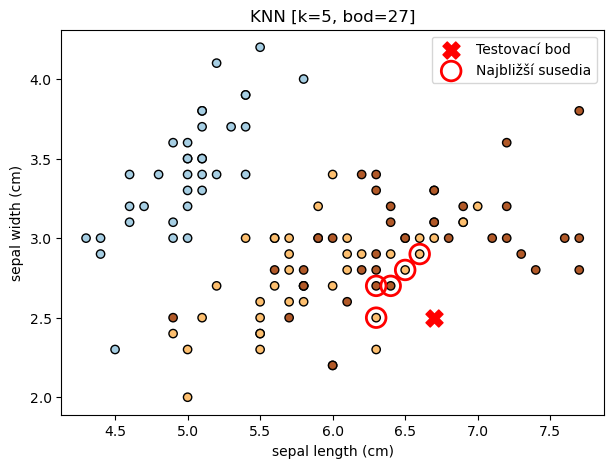


Skutočná trieda: virginica

Najbližší susedia:
   1. sused → versicolor, vzdialenosť: 0.361
   2. sused → virginica, vzdialenosť: 0.361
   3. sused → versicolor, vzdialenosť: 0.400
   4. sused → versicolor, vzdialenosť: 0.412
   5. sused → virginica, vzdialenosť: 0.447

Predikovaná trieda: versicolor



In [7]:
user_input = int(input(f"Vyber bod z testovacej množiny 1-{X_test.shape[0]}: "))
index = user_input - 1

point = X_test[index].reshape(1, -1)
true_class = y_test[index]
neighbors = NearestNeighbors(n_neighbors=k, metric=metricType)
neighbors.fit(X_train)
distances, indices = neighbors.kneighbors(point)
pred_class = model.predict(point)[0]
neighbor_classes = y_train[indices[0]]
neighbor_class_names = [data.target_names[c] for c in neighbor_classes]
neighbor_distances = distances[0]

plt.figure(figsize=(7,5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='Paired', edgecolor='k')
plt.scatter(point[:, 0], point[:, 1], c='red', marker='X', s=150, label='Testovací bod')
plt.scatter(X_train[indices[0], 0], X_train[indices[0], 1], s=200, facecolors='none', edgecolors='r',linewidths=2, label='Najbližší susedia')
plt.legend()
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title(f"KNN [k={k}, bod={index+1}]")
plt.show()

print(f"\nSkutočná trieda: {data.target_names[true_class]}")
print("\nNajbližší susedia:")
for i, (c, d) in enumerate(zip(neighbor_class_names, neighbor_distances)):
    print(f"   {i+1}. sused → {c}, vzdialenosť: {d:.3f}")
print(f"\nPredikovaná trieda: {data.target_names[pred_class]}\n")

#### Ukážka pridania vlastného bodu a následnej klasifikácie 

- pridaj vlasný bod pomocou hodnôt parametrov a sleduj akým spôsobom ho algoritmus klasifikuje

Zadaj sepal length (cm):  6.75
Zadaj sepal width (cm):  2.5


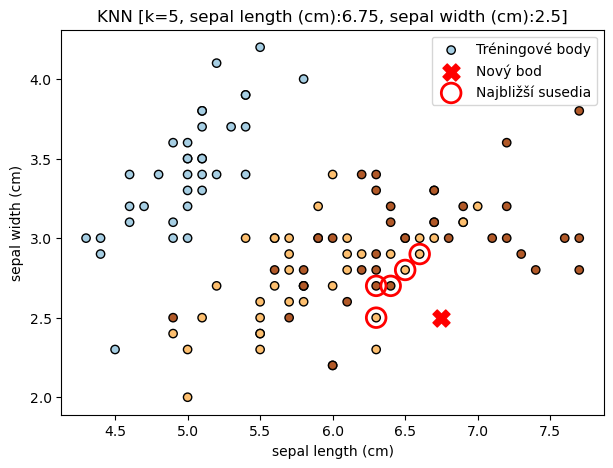


Najbližší susedia:
   1. sused → trieda: versicolor, vzdialenosť: 0.391
   2. sused → trieda: virginica, vzdialenosť: 0.403
   3. sused → trieda: versicolor, vzdialenosť: 0.427
   4. sused → trieda: versicolor, vzdialenosť: 0.450
   5. sused → trieda: virginica, vzdialenosť: 0.492

Predikovaná trieda: versicolor


In [9]:
x_input = float(input(f"Zadaj {data.feature_names[0]}: "))
y_input = float(input(f"Zadaj {data.feature_names[1]}: "))
new_point = np.array([[x_input, y_input]])

pred_class = model.predict(new_point)[0]
neighbors = NearestNeighbors(n_neighbors=k, metric=metricType)
neighbors.fit(X_train)
distances, indices = neighbors.kneighbors(new_point)
neighbor_classes = y_train[indices[0]]

plt.figure(figsize=(7,5))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='Paired', edgecolor='k', label='Tréningové body')
plt.scatter(new_point[:, 0], new_point[:, 1], c='red', marker='X', s=150, label='Nový bod')
plt.scatter(X_train[indices[0], 0], X_train[indices[0], 1], s=200, facecolors='none', edgecolors='r', linewidths=2, label='Najbližší susedia')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title(f"KNN [k={k}, {data.feature_names[0]}:{x_input}, {data.feature_names[1]}:{y_input}]")
plt.legend()
plt.show()

print("\nNajbližší susedia:")
for i, (dist, cls) in enumerate(zip(distances[0], neighbor_classes)):
    print(f"   {i+1}. sused → trieda: {data.target_names[cls]}, vzdialenosť: {dist:.3f}")
print(f"\nPredikovaná trieda: {data.target_names[pred_class]}")

---

### Interpretácia výsledkov KNN
- presnosť
- matica zámen
- rozhodovacie hranice

---

#### Presnosť
- vyjadruje ako presne model dokázal klasifikovať vzorky do tried
- rozsah od 0 do 1, pričom 1 znamená úplnú presnosť

In [12]:
acc = accuracy_score(y_test, y_pred)
print(f"Presnosť: {acc:.4f}")

Presnosť: 0.7895


---

#### Matica zámen
- matica zámen zobrazuje počty správnych a nesprávnych predikcií pre jednotlivé triedy
- najväčšie čísla na diagonále znamenajú lepšiu presnosť modelu
- takisto je možné zistiť, ktoré triedy si model najčastejšie zamieňal medzi sebou, ako aj ktoré triedy dokázal rozpoznávať najpresnejšie

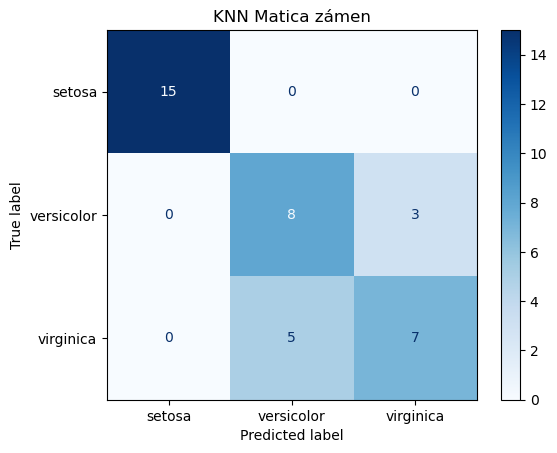

In [13]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("KNN Matica zámen")
plt.show()

---

#### Rozhodovacie hranice
- zobrazujú, ako model rozdeľuje priestor vstupných údajov medzi jednotlivé triedy, teda kde presne prechádza hranica medzi oblasťami tried

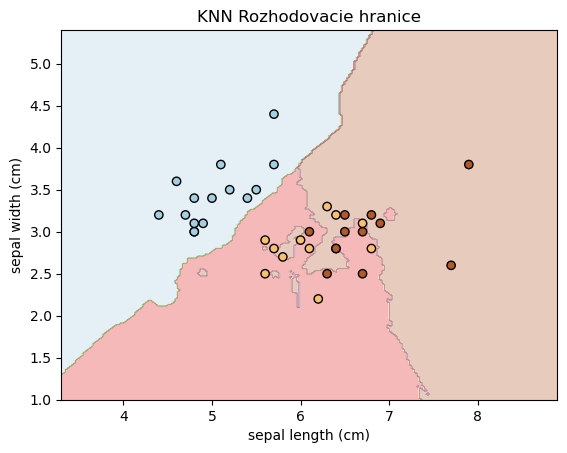

In [14]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("KNN Rozhodovacie hranice")
plt.show()

---

##### Úlohy na zamyslenie - KNN
- zmeň parameter **k** a sleduj ako sa mení správanie a výstup modelu
- prečo je KNN s malým **k** citlivejšie na šum?
- prečo sú rozhodovacie hranice často nepravidelné?
- čo by sa stalo ak by k=1? Alebo naopak k by bolo velmi velké číslo?
- prečo je KNN výpočtovo náročné pri velkých datasetoch?

---

## Klastrovanie

- **Princíp**: je technika učenia bez dohľadu, pri ktorej má model prístup len k vstupným dátam, bez vopred definovaných výstupných tried alebo označení
- **Cieľ**: rozdeliť dáta do skupín - zhlukov, tak, aby body v rámci jedného zhluku boli čo najpodobnejšie a body v rôznych zhlukoch čo najodlišnejšie
- **Definícia zhluku**: každý zhluk predstavuje skupinu dátových bodov, ktoré majú spoločné vlastnosti a sú si blízke v priestore
- **Segmentácia dát**: zhlukovanie pomáha odhaliť vzory alebo štruktúry v dátach a poskytuje pohľad na ich prirodzené usporiadanie
- **Metódy klastrovania**: Na zhlukovanie existuje viacero prístupov a algoritmov - napríklad centroidové metódy ako **K-Means**, hustotné metódy ako **DBSCAN** alebo hierarchické prístupy, ktoré sa líšia spôsobom, akým zhluky v dátach hľadajú

### K-Means
- pre klasifikáciu objektov použijeme K-Means, pretože datasety obsahujú pomerne dobre oddelené zhluky, pre ktoré je tento algoritmus vhodný a poskytuje prehľadné výsledky

---

In [15]:
# Nastavenie parametra počet zhlukov

n = int(input("Počet zhlukov:"))

Počet zhlukov: 3


In [16]:
# Spustenie modelu

kmeans = KMeans(n_clusters=n, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.labels_

---

### Interpretácia výsledkov modelu
- ARI
- Silhouette Score
- Histogram vzdialeností od centoridov
- Vizualizáciu centroidov s prislúchajúcimi bodmi

---

#### ARI
- adjusted rand index - vyčísluje zhodu medzi skutočnými triedami a priradenými klastrami
- 1 znamená perfektnú zhodu

In [17]:
ari = adjusted_rand_score(y, y_kmeans)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

Adjusted Rand Index (ARI): 0.6007


##### Úloha na zamyslenie
- prečo môže byť ARI vysoké, aj keď vizuálne klastre nevyzerajú dobre oddelené?

---

#### Silhouette Score
- meria, ako blízko sú body k svojmu klastru v porovnaní s ostatnými - hodnotí len vnútornú kvalitu zhlukov
- ide o kompaktnosť a oddelenost zhlukov
- skóre nad 0.7 označuje výborné klastrovanie, hodnoty okolo 0 znamenajú prekryv zhlukov, a záporné hodnoty nesprávne priradenie bodov

In [18]:
sil_score = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.4451


##### Úloha na zamyslenie
- prečo môže byť Silhouette score vysoké aj pri klastroch s rôznou hustotou?

---

#### Histogram vzdialeností od centroidov
- znázorňuje rozdelenie vzdialeností bodov od ich centroidu, čím poskytuje prehľad o kompaktnosti zhlukov - čím sú vzdialenosti menšie, tým sú klastre súdržnejšie a lepšie definované

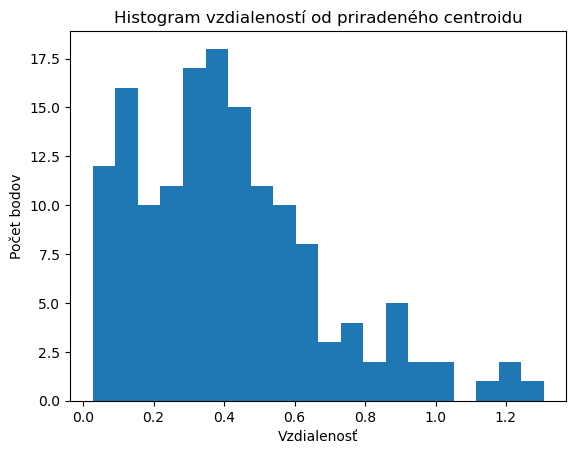

In [19]:
distances = np.min(kmeans.transform(X), axis=1)
plt.hist(distances, bins=20)
plt.title("Histogram vzdialeností od priradeného centroidu")
plt.xlabel("Vzdialenosť")
plt.ylabel("Počet bodov")
plt.show()

##### Úloha na zamyslenie
- ako sa zmení takýto histogram pri zmene parametra **k**?

---

#### Vizualizáciu centroidov s prislúchajúcimi bodmi
- vizualizuje ako K-Means rozdelil priestor, kde sú centroidy klastrov, a či sú klastre dobre oddelené alebo sa prekrývajú

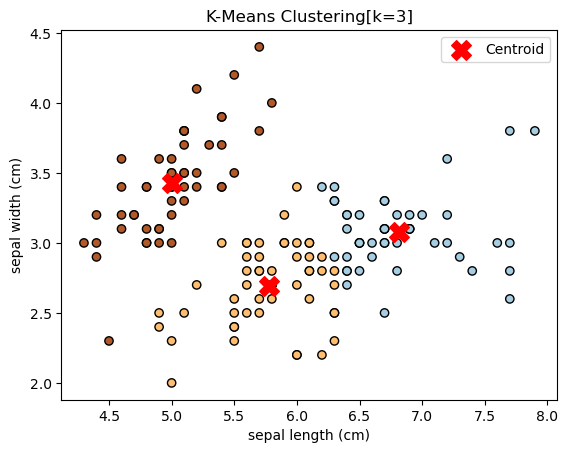

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap=plt.cm.Paired, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroid')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title(f"K-Means Clustering[k={n}]")
plt.legend()
plt.show()

#### Pridanie vlastného bodu
- pridaj vlasný bod - sleduj ako je vzdialený od jednotlivých klastrov - sleduj ku ktorému bude priradený

Zadaj hodnotu pre sepal length (cm):  6.1
Zadaj hodnotu pre sepal width (cm):  2.8



Nový bod: [[6.1 2.8]]

Vzdialenosti od centroidov:
 - Klaster 0: 0.764
 - Klaster 1: 0.344
 - Klaster 2: 1.261

Bod by patril do klastru: 1


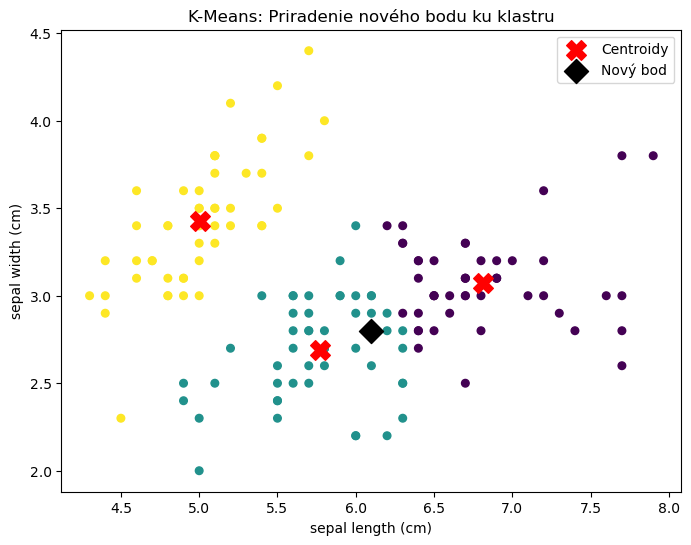

In [21]:
x_input = float(input(f"Zadaj hodnotu pre {data.feature_names[0]}: "))
y_input = float(input(f"Zadaj hodnotu pre {data.feature_names[1]}: "))
new_point = np.array([[x_input, y_input]])

distances = np.linalg.norm(kmeans.cluster_centers_ - new_point, axis=1)
assigned_cluster = np.argmin(distances)

print("\nNový bod:", new_point)
print("\nVzdialenosti od centroidov:")
for i, d in enumerate(distances):
    print(f" - Klaster {i}: {d:.3f}")

print(f"\nBod by patril do klastru: {assigned_cluster}")

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', s=200, marker='X', label="Centroidy")
plt.scatter(new_point[:, 0], new_point[:, 1], 
            c='black', s=150, marker='D', label='Nový bod')
plt.title("K-Means: Priradenie nového bodu ku klastru")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend()
plt.show()

##### Úloha na zamyslenie
- môžu sa centroidy nachádzať mimo "hustejšich" častí bodov v priestore? 